In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from  sklearn.ensemble import IsolationForest
from datetime import datetime
import warnings
import sklearn
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif

In [215]:
original_data = pd.read_csv('C:/Users/atade/OneDrive/Рабочий стол/Learning/Training/House/train.csv')
data = original_data.copy()
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [216]:

for i in data.columns:
    if data[i].count() < 0.7 * 1460:
        data.drop(i, axis=1, inplace=True)

data.drop('Id', inplace=True, axis=1)


In [217]:

list_of_types_object = list()
list_of_types_num = list()

for i in data.columns:
    if data[i].dtype != np.dtype('int64') and data[i].dtype != np.dtype('float64'):
        list_of_types_object.append(i)
    else:
        list_of_types_num.append(i)


data_object = data[list_of_types_object]
data_num = data[list_of_types_num]

data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [218]:
data_object['BldgType'].value_counts(normalize=True, sort=True)

BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64

In [219]:
dict_of_lenghts = dict()
list_for_del = list()

for i in data_object.columns:
    dict_of_lenghts[i] = [len(data_object[i].value_counts()), round(data_object[i].value_counts(normalize=True, sort=True)[0], 3)]

print('len(dict_of_lenghts) before:', len(dict_of_lenghts))

for i, val in dict_of_lenghts.items():
    if val[1] > 0.9:
        list_for_del.append(i)

for i in list_for_del:
    dict_of_lenghts.pop(i)


print('len(dict_of_lenghts) after:', len(dict_of_lenghts))

data_object = data_object[dict_of_lenghts.keys()]

len(dict_of_lenghts) before: 37
len(dict_of_lenghts) after: 24


In [220]:
dict_of_lenghts = dict()
list_for_del = list()



for i in data_num.columns:
    dict_of_lenghts[i] = [len(data_num[i].value_counts()), round(data_num[i].value_counts(normalize=True, sort=True).max(), 3)]

print(f'len(dict_of_lenghts) before: {len(dict_of_lenghts)}')

for i, val in dict_of_lenghts.items():
    if val[1] > 0.9:
        list_for_del.append(i)

for i in list_for_del:
    dict_of_lenghts.pop(i)


print('len(dict_of_lenghts) after:', len(dict_of_lenghts))

data_num = data_num[dict_of_lenghts.keys()]


len(dict_of_lenghts) before: 37
len(dict_of_lenghts) after: 30


<AxesSubplot: >

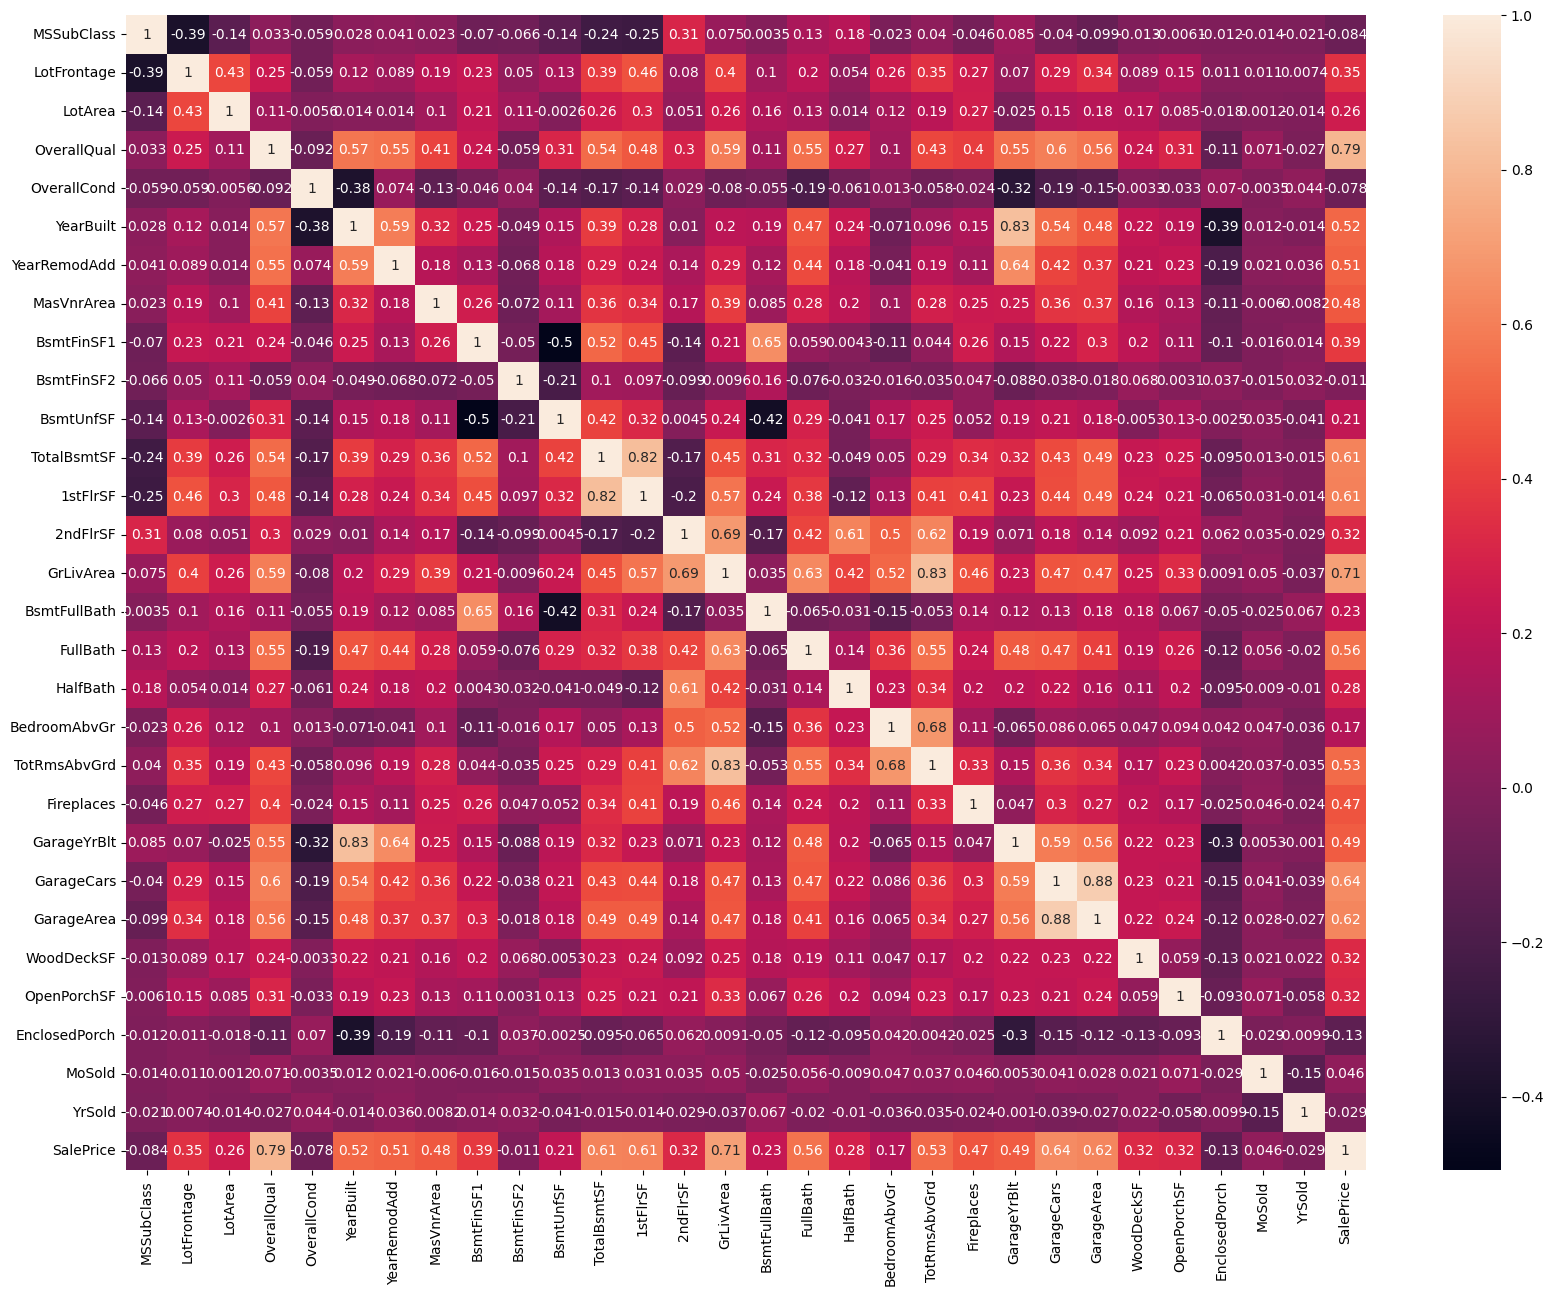

In [231]:
figure = plt.subplots(1,1,figsize=(20,15))

sns.heatmap(data_num.corr(), annot=True)